# y = abs((ln(abs(sin(6x - 9) + 1)) * (19 / sqrt(x)) - exp(cos(x) - 1) / 2x) - 9)

In [2]:
import numpy as np
import pandas
import math

def func(x):
    return abs((math.log(math.sin(6 * x - 9) + 1) * (19 / math.sqrt(x)) - math.exp(math.cos(x) - 1) / 2 * x) - 9)

array = np.arange(1, 201, dtype=float)
for i in range(200):
    array[i] = func(array[i])
    
table = pandas.DataFrame(array, columns=['y'])
table.to_csv(r'./function.csv')

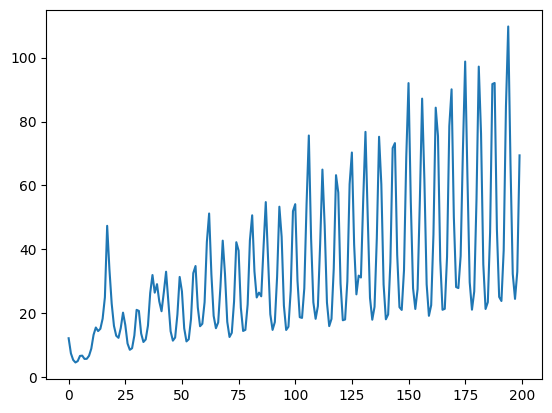

In [3]:
import matplotlib.pyplot as plt

plt.plot(array)

In [4]:
import tensorflow as tf
from sklearn import model_selection, preprocessing
import numpy as np
import pandas as pd

data = pd.read_csv(r'./function.csv')
display(data)
data.shape

2023-04-02 13:59:32.621367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 13:59:32.790996: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 13:59:32.791022: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 13:59:33.610819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

,Unnamed: 0,y
0,0,12.206133
1,1,7.469086
2,2,5.419515
3,3,4.623680
4,4,5.055590
...,...,...
195,195,66.923281
196,196,32.316988
197,197,24.516505
198,198,33.011036


(200, 2)

In [5]:
array = np.array(data['y'])

x = np.zeros([190, 10])
for i in range(190):
    x[i] = array[i:i+10]
    
y = data['y'][10:200]

display(x.shape, y.shape)

(190, 10)

(190,)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(200, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation=None))

model.compile(optimizer='ADAM',
             loss='MSLE',
             metrics='MAPE')

In [14]:
model.fit(x, y, epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 2ms/step - loss: 3.6228 - MAPE: 76.1280
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 0.4584 - MAPE: 39.9213
Epoch 3/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2823 - MAPE: 43.2631
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2708 - MAPE: 50.0540
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2701 - MAPE: 53.6719
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2700 - MAPE: 55.2993
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2630 - MAPE: 54.9724
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2513 - MAPE: 53.4450
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2375 - MAPE: 51.3316
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 0.2225 - MAPE: 48.6833
Epoch 11/300
6/6 [==============================] - 0s 3ms/

6/6 [==============================] - 0s 3ms/step - loss: 0.0148 - MAPE: 8.6561
Epoch 88/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0147 - MAPE: 8.6217
Epoch 89/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0146 - MAPE: 8.5191
Epoch 90/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0143 - MAPE: 8.3976
Epoch 91/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0143 - MAPE: 8.5101
Epoch 92/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0142 - MAPE: 8.3903
Epoch 93/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0141 - MAPE: 8.4296
Epoch 94/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0137 - MAPE: 8.3440
Epoch 95/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0140 - MAPE: 8.3533
Epoch 96/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0140 - MAPE: 8.5788
Epoch 97/300
6/6 [==============================] - 0s 3ms/step - loss: 0

6/6 [==============================] - 0s 3ms/step - loss: 0.0092 - MAPE: 6.4711
Epoch 174/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0093 - MAPE: 6.4831
Epoch 175/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0093 - MAPE: 6.5039
Epoch 176/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0092 - MAPE: 6.4589
Epoch 177/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0091 - MAPE: 6.4234
Epoch 178/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0092 - MAPE: 6.4871
Epoch 179/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0091 - MAPE: 6.3838
Epoch 180/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0091 - MAPE: 6.3527
Epoch 181/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0091 - MAPE: 6.3707
Epoch 182/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0090 - MAPE: 6.3312
Epoch 183/300
6/6 [==============================] - 0s 3ms/step

6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.5679
Epoch 260/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.5566
Epoch 261/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.4675
Epoch 262/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.4891
Epoch 263/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.5035
Epoch 264/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0076 - MAPE: 5.5735
Epoch 265/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0074 - MAPE: 5.4430
Epoch 266/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0075 - MAPE: 5.4611
Epoch 267/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0074 - MAPE: 5.5404
Epoch 268/300
6/6 [==============================] - 0s 3ms/step - loss: 0.0073 - MAPE: 5.4066
Epoch 269/300
6/6 [==============================] - 0s 3ms/step

In [15]:
n = 200

predicted_array = np.zeros(n + 10)
predicted_array[0:10] = array[len(array) - 10: len(array)]

for i in range(n):
    tmp_arr = predicted_array[i:i+10]
    tmp_arr.shape = (1, 10)
    predicted_array[i + 10] = model.predict_on_batch(tmp_arr)

predicted_array

array([ 25.12864274,  23.8553692 ,  39.68494577,  84.7729879 ,
       109.74236612,  66.92328149,  32.31698845,  24.51650544,
        33.0110357 ,  69.41911181, 109.78157806,  76.94046021,
        36.11646652,  23.12277222,  26.83703423,  57.52695847,
       106.1046524 ,  94.70592499,  44.58780289,  24.68785858,
        25.69941139,  48.18609619,  98.36769867, 110.62481689,
        57.05527496,  29.07975388,  26.57525635,  40.4046669 ,
        85.60623169, 118.62644196,  69.85809326,  32.95196533,
        25.13235474,  32.97374344,  70.8210144 , 117.36013031,
        84.94589233,  38.6924324 ,  24.07283783,  27.7702198 ,
        58.36387634, 110.77165985, 103.0167923 ,  48.30881882,
        25.76023674,  26.60568428,  49.37065506, 101.88922882,
       118.8243866 ,  61.86605453,  30.58885956,  27.27927017,
        41.47422409,  88.4675293 , 126.16136169,  76.00775146,
        35.62749863,  26.38622093,  33.97117233,  73.2549057 ,
       123.65094757,  92.0075531 ,  41.66685104,  25.11

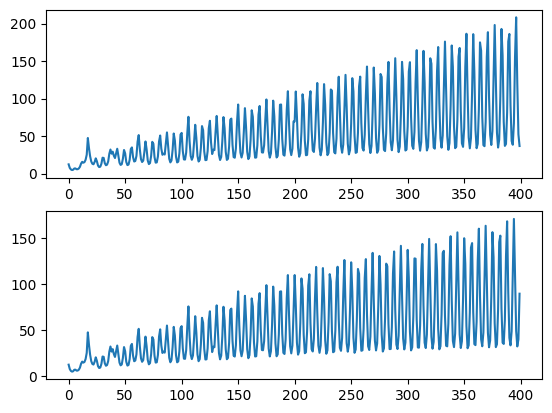

In [16]:
second_array = np.arange(200, 200+n, dtype=float)

for i in range(n):
    second_array[i] = func(second_array[i])
    
source_final_array = np.hstack((array, second_array))
predict_final_array = np.hstack((array, predicted_array[10: len(predicted_array)]))

plt.subplot(211)
plt.plot(source_final_array)

plt.subplot(212)
plt.plot(predict_final_array)

plt.show()